In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
def print_metrics(y_test,predictions,model):
    print('\033[1m' + model + '\033[0m' + '\n\n')
    print('\033[1m' + 'Classification Report - ' + '\033[0m')
    print(classification_report(y_test, predictions))
    print('\033[1m' + 'ROC AUC Score - ' + '\033[0m')
    print(roc_auc_score(y_test, predictions))
    print('\033[1m' + 'Accuracy Score - ' + '\033[0m')
    print(accuracy_score(y_test, predictions))

In [4]:
def dtree(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=18)
    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    predictions_dt = dt.predict(X_test)
    print_metrics(y_test, predictions_dt, 'Decision Tree')

In [5]:
def rforrest(X,Y,n):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=18)
    rfc = RandomForestClassifier(n_estimators=n,n_jobs=-1)
    rfc.fit(X_train,y_train)
    predictions_rfc = rfc.predict(X_test)
    print_metrics(y_test, predictions_rfc, 'Random Forrest')

In [6]:
def svm_runner(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=18)
    svc = SVC(kernel='linear')
    svc.fit(X_train,y_train)
    predictions_svm = svc.predict(X_test)
    print('\033[1m' + 'SVM' + '\033[0m' + '\n\n')
    print('\033[1m' + 'ROC AUC Score' + '\033[0m')
    print(roc_auc_score(y_test, predictions_svm))

In [11]:
def lgbm_runner(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=18)
    train_lgb = lgb.Dataset(data=X_train, label=y_train)
    test_lgb = lgb.Dataset(data=X_test, label=y_test)
    params = {
        'task': 'train', 
        'boosting_type': 'gbdt', 
        'objective': 'binary', 
        'metric': 'auc', 
        'learning_rate': 0.02, 
        'num_leaves': 50, 
        'verbose': 0, 
        'colsample_bytree': 0.6, 
        'subsample': 0.9, 
        'max_depth': 10, 
        'reg_alpha': 0.5, 
        'reg_lambda': 0.0, 
        'min_split_gain': 0.01, 
        'min_child_weight': 40
    }
    model = lgb.train(params, train_lgb,500)
    predictions_lgb = model.predict(X_test)
    print('\033[1m' + 'Light GBM' + '\033[0m' + '\n\n')
    print('\033[1m' + 'ROC AUC Score' + '\033[0m')
    print(roc_auc_score(y_test, predictions_lgb))
    lgb.plot_importance(model, figsize=(10,25), max_num_features=100)
    

In [8]:
X = pd.read_csv('../input/final_data.csv')
Y = pd.read_csv('../input/final_target.csv', header=None)

In [ ]:
Y.columns = ['x','TARGET']
Y = Y.drop('x', axis=1)
merger = pd.concat([X,Y], axis=1, join_axes=[X.index])
merger_reduced = merger[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','AMT_ANNUITY','DAYS_BIRTH','prev_loans_CNT_INSTALMENT_FUTURE','prev_loans_SK_DPD_DEF','installment_AMT_PAYMENT','AMT_CREDIT','prev_appsCNT_PAYMENT']].sample(n=10000)
X_reduced = merger_reduced.drop('TARGET', axis=1)
Y_reduced = merger_reduced['TARGET']


In [23]:
svm_runner(X_reduced,Y_reduced)

SVM


ROC AUC Score}
0.4991798797156916


In [9]:
Y = Y[1]

In [18]:
dtree(X,Y)

Decision Tree


Classification Report - 
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     56582
           1       0.15      0.18      0.16      4921

   micro avg       0.86      0.86      0.86     61503
   macro avg       0.54      0.55      0.54     61503
weighted avg       0.87      0.86      0.86     61503

ROC AUC Score - 
0.5460996300309157
Accuracy Score - 
0.8561370990033007


In [19]:
rforrest(X,Y,200)

Random Forrest


Classification Report - 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56582
           1       1.00      0.00      0.00      4921

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.96      0.50      0.48     61503
weighted avg       0.93      0.92      0.88     61503

ROC AUC Score - 
0.5002032107295266
Accuracy Score - 
0.9200201616181325


Light GBM


ROC AUC Score
0.7812854539998564


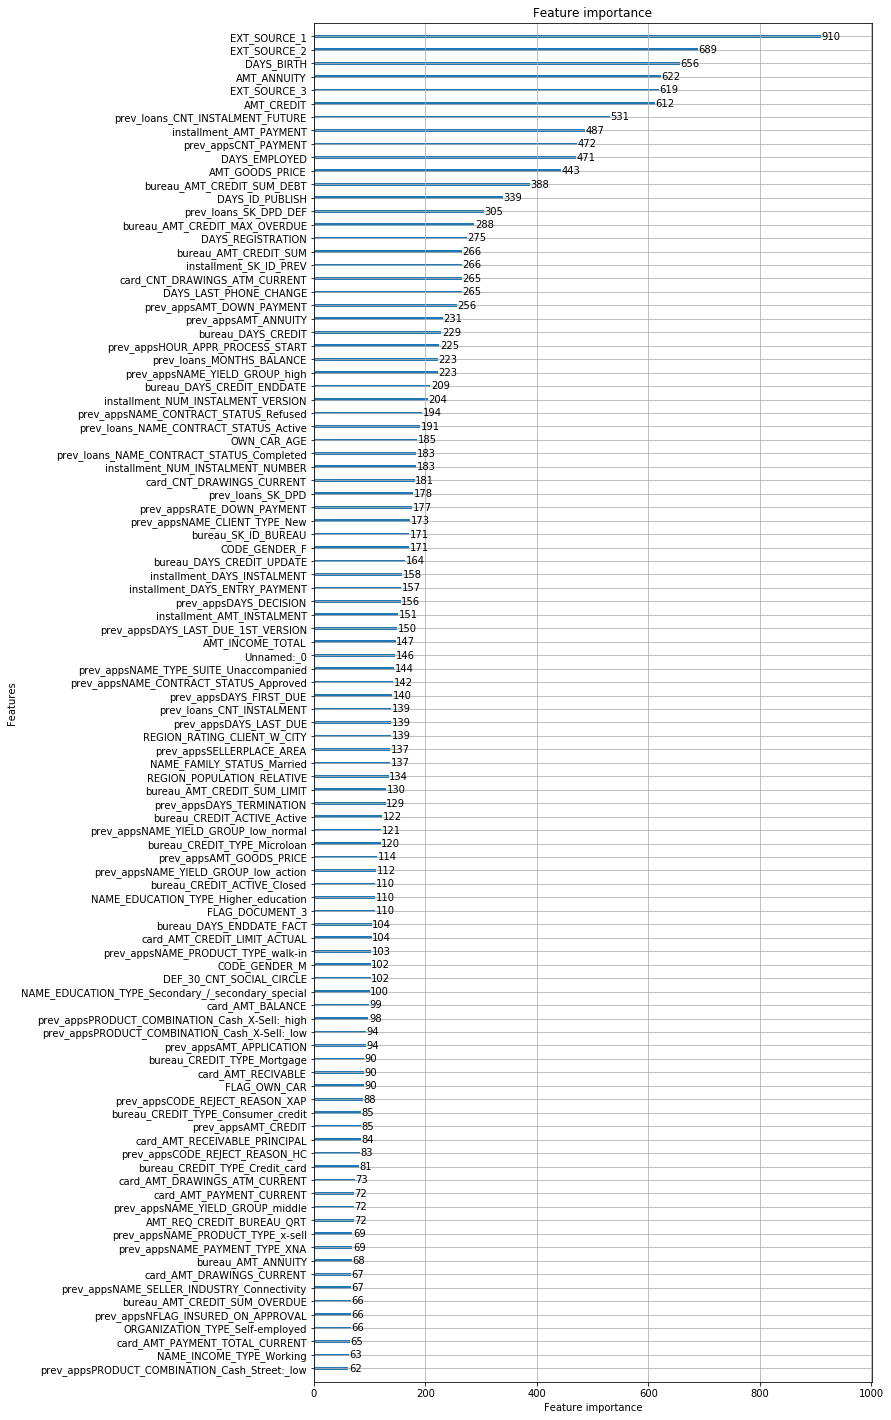

In [16]:
lgbm_runner(X,Y)